# Lecture 1: Visualization

In this notebook we will learn about how to visualize data with different methods.

In [1]:
# import some of our best friends
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # fancy plots
import pandas as pd # fancy plots need to come from pd data structure

## Group Data

Compare 2 groups of independent data. This is useful in behavioral analysis (compare behavioral measurement, model performance...)

Let's create some artificial dataset first. Simulate 2 random [Gaussian distributions](https://www.geogebra.org/m/fqZMa34Q).

In [2]:
# simulate 2 groups with different mean and standard deviation
nsamples = 50

y1 = np.random.randn(nsamples) * 15 + 50
y2 = np.random.randn(nsamples) * 13 + 70

In [3]:
# calculate basic properties to plot
M = [np.mean(y) for y in [y1,y2]] # mean
V = [np.std(y) for y in [y1,y2]]  # variance

Bar plots!

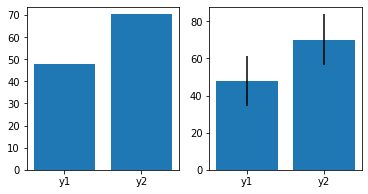

In [ ]:
# create 3 plots side by side
fig,ax = plt.subplots(1,2, figsize=(6,3))

# basic bar plot
ax[0].bar([1,2],M);
ax[0].set(xticks=[1,2],xticklabels=['y1','y2']);

# add error bars
ax[1].bar([1,2],M,yerr=V);
ax[1].set(xticks=[1,2],xticklabels=['y1','y2']);

Fancy bar plots!

In [ ]:
# create a panda DataFrame - like a spreadsheet
df = pd.DataFrame(np.vstack((y1,y2)).T,columns = ['y1','y2'])

In [ ]:
# view the spreadsheet
df

,y1,y2
0,61.919375,64.689652
1,68.808080,46.179721
2,42.573750,51.787871
3,49.152214,76.585216
4,30.363617,56.769631
5,35.458916,96.563903
6,57.271054,77.548851
7,49.636423,86.030785
8,51.602305,90.093717
9,41.473329,74.897606


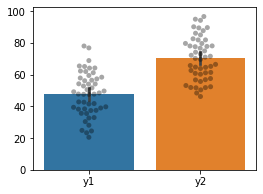

In [ ]:
# plotting is quicker
fig,ax = plt.subplots(figsize=(4,3))
sns.barplot(data=df); 
# we can see there's a shorter error bar here, for that sns plots standard error instead of standard deviation (std / (n_sample-1))

# and now we add visualization of individual points
sns.swarmplot(data=df,color="0", alpha=.35);

In [ ]:
# Homework: try doing this in matlibplot

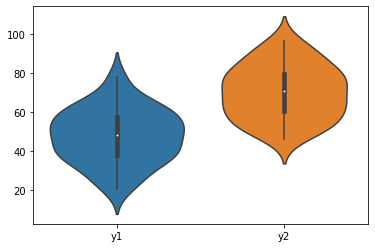

In [ ]:
# violin plot
sns.violinplot(data=df);

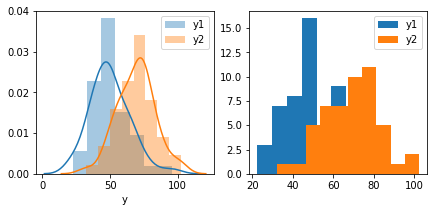

In [4]:
# histogram
fig,ax = plt.subplots(1,2,figsize=(7,3))

# seaborn histogram
h1 = sns.distplot(a=y1,ax=ax[0]);
h2 = sns.distplot(a=y2,ax=ax[0]);
ax[0].set(xlabel='y')
ax[0].legend(['y1','y2']);

# matplotlib histogram
ax[1].hist(y1);
ax[1].hist(y2);
ax[1].legend(['y1','y2']);

Last but not the least, statistical test:

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(y1,y2)

Ttest_indResult(statistic=-8.160788086019362, pvalue=1.1501092512894758e-12)

## Paired group test

In [ ]:
# simulate 2 groups with different mean and standard deviation
nsamples = 50

y1 = np.random.randn(nsamples) * 5 + 50
y2 = y2 + 30 + np.random.randn(nsamples) # each y2 sample is generated based on corresponding y2 sample

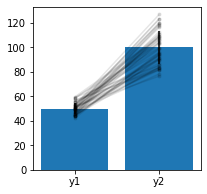

In [ ]:
fig,ax = plt.subplots(figsize=(3,3))

# don't forget to recalculate value for plot
M = [np.mean(y1), np.mean(y2)]
V = [np.std(y1), np.std(y2)]

# bars with error bars
ax.bar([1,2],M,yerr=V);
ax.set(xticks=[1,2],xticklabels=['y1','y2']);

# now data is paired, let's connect them
ax.plot([1,2],np.vstack((y1,y2)),'.-',color=[0,0,0,0.1]);

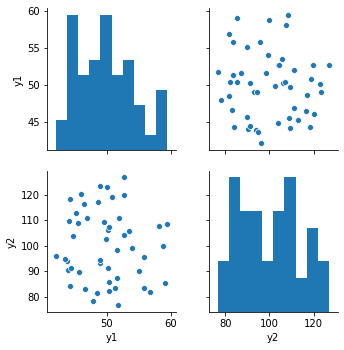

In [ ]:
# to do this in seaborn
df = pd.DataFrame(np.vstack((y1,y2)).T,columns = ['y1','y2']) # create a new table
sns.pairplot(df);

## Time series data

General electrophysiological data (LFP, EEG), calcium signal.

In [ ]:
# simplest example: sine wave with noise

# create sample data
Fs = 1000 # sampling frequency
t = np.arange(0,0.3, 1/Fs)  # create time axis

In [ ]:
# start with 1 sine wave
# y = 0.7 * np.sin(2*np.pi*50*t)
# or 2
y = 0.7 * np.sin(2*np.pi*50*t + np.pi/8) + np.sin(2*np.pi*120*t)

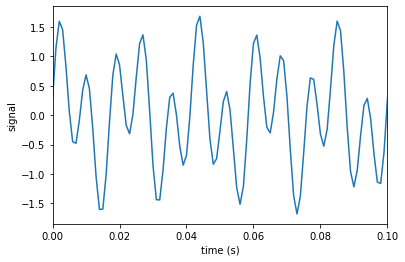

In [ ]:
fig,ax = plt.subplots()
ax.plot(t,y)
ax.set(xlabel='time (s)', ylabel='signal',xlim=[0,0.1]);

Frequency analysis

In [ ]:
# compute fast fourier transformation
sp = np.fft.fft(y)
freq = np.fft.fftfreq(t.shape[-1],1/Fs)

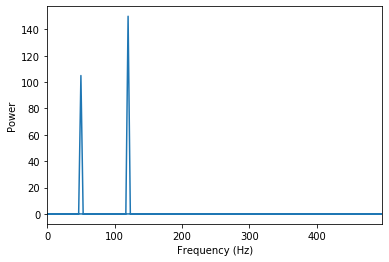

In [ ]:
# plot in fourier domain
fig,ax = plt.subplots()
ax.plot(freq,np.abs(sp));
ax.set(xlim=[0,max(freq)], xlabel='Frequency (Hz)', ylabel='Power');

Check out [MNE](https://mne.tools/stable/index.html#) for more details (or bring your data on Friday).

## Spiking data

In [20]:
# load sample datas
spiketime = np.load('spiketime.npy')
eventtime = np.load('eventtime.npy')

In [21]:
print('Spike time contains a vector with n elements, each corresponding to the time stamp of one spike.')
print('Event time corresponds to time stamps of event of interest.')
print(f'{spiketime.shape[0]} spikes in total')

print('Check time stamps of first 5 spike:')
print(spiketime[:5])

Spike time contains a vector with n elements, each corresponding to the time stamp of one spike.
Event time corresponds to time stamps of event of interest.
22235 spikes in total
Check time stamps of first 5 spike:
[[0.05069955]
 [0.08463259]
 [0.1211656 ]
 [0.14586538]
 [0.16779852]]


Raster plot:

In [ ]:
# select time window of interest:
toi = np.array([-0.1,1])

In [ ]:
# collect spikes within certain time point (e.g. t=1 ~ t=2)
spiketime[(spiketime<2) & (spiketime>=1)]

array([1.03505756, 1.09122373, 1.63958557, 1.8147507 ])

In [ ]:
# collect spikes within time window
tspk = [spiketime[(spiketime<t+toi[1]) & (spiketime>=t+toi[0])]-t for t in eventtime]

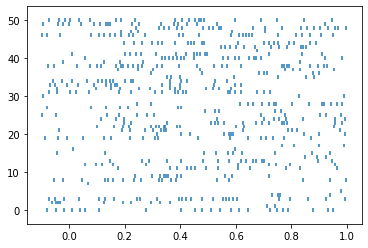

In [ ]:
plt.eventplot(tspk);

In [ ]:
# Homework: make this into a function
# so you can run plot_raster(spiketime, eventtime)